In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas_datareader as web
import math
import yfinance as yf
import pandas as pd
import seaborn as sns

In [2]:
from keras import Input
from keras import layers
from tensorflow.keras.optimizers import RMSprop
import random

In [3]:
import sys
sys.path.append('../..')

#import ep.etools as apt

In [4]:
dataCalendar = pd.read_csv('./data/bloc_ttf_calendar_prices.csv')
dataPrices = pd.read_csv('./data/bloc_ttf_prices.csv')
dataPrices[' '] = pd.to_datetime(dataPrices[' '])
dataPrices = dataPrices.set_index(' ')


In [5]:
dataPrices['moy20'] = dataPrices['Day-ahead'].rolling(20).mean()

<AxesSubplot:xlabel=' '>

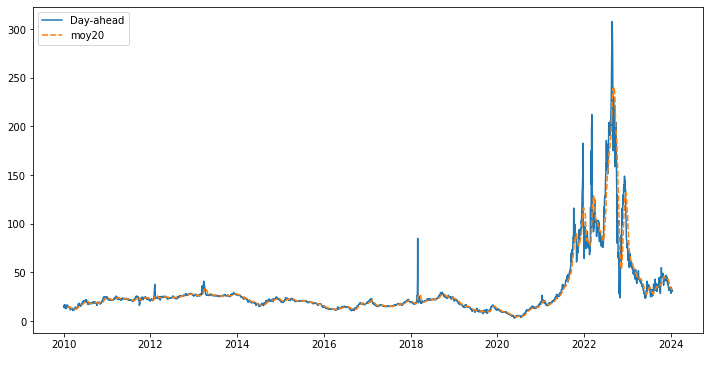

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(dataPrices[['Day-ahead','moy20']], color='Blue')
#ax2 = plt.twinx()
#sns.lineplot(data=final['€/$'], ax=ax2 , color='grey')

<AxesSubplot:xlabel=' '>

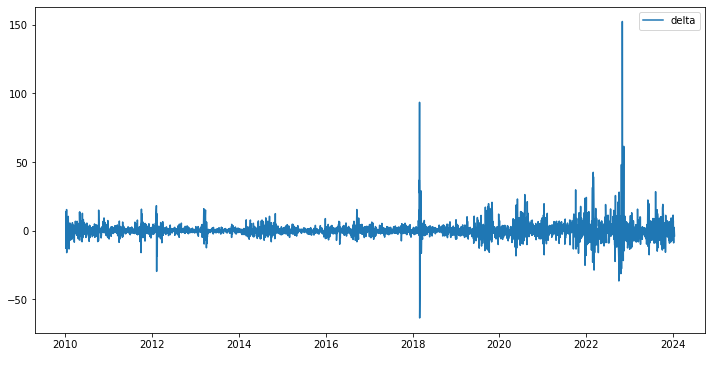

In [7]:
#Variation en %
dataPrices['delta'] =dataPrices['Day-ahead'].rolling(2).apply(lambda x: (x.iloc[1] - x.iloc[0])/x.iloc[0]*100)
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(dataPrices[['delta']], color='Blue')


In [8]:
std = dataPrices['delta'].std()
max = dataPrices['delta'].max()
inc = std/10.
print(std,max)

6.0295968222450105 152.31286795626576


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0.30268095601708017 to 151.6431589645572
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   val     251 non-null    int64  
 1   freq    251 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.9 KB
None


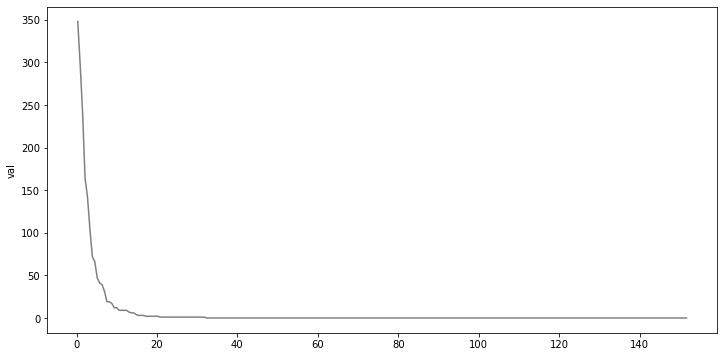

In [35]:
#df= dataPrices['delta'].value_counts(bins=100)
# create intervals

bins = pd.interval_range(0, max, freq=inc)
# assign each value in df["column"] to bin and count bin occurences
counts = pd.cut(dataPrices['delta'], bins).value_counts()
# print(counts.info)
# create a Series, indexed by interval midpoints and convert to dictionary
pdS = pd.Series(counts.values, index=bins.mid).to_frame()   #.to_dict()
pdS['freq'] = pdS.index.values
fig, ax = plt.subplots(figsize=(12,6))
#plt.yscale('log')
#plt.xscale('log')
pdS = pdS.rename(columns={0:'val'})
sns.lineplot(pdS['val'], color='Grey')
print(pdS.info())

In [38]:
distribution = pdS
# distribution = distribution.rename(columns={0:'val'})
# distribution['freq'] = (bins.mid)
distribution['cumul'] = distribution['val'].cumsum(skipna=True)
distribution.reset_index(drop=True,inplace=True)
print(distribution.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   val     251 non-null    int64  
 1   freq    251 non-null    float64
 2   cumul   251 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.0 KB
None


0        0.302681
1        0.908043
2        1.513405
3        2.118767
4        2.724129
          ...    
246    149.221711
247    149.827073
248    150.432435
249    151.037797
250    151.643159
Name: freq, Length: 251, dtype: float64


<AxesSubplot:>

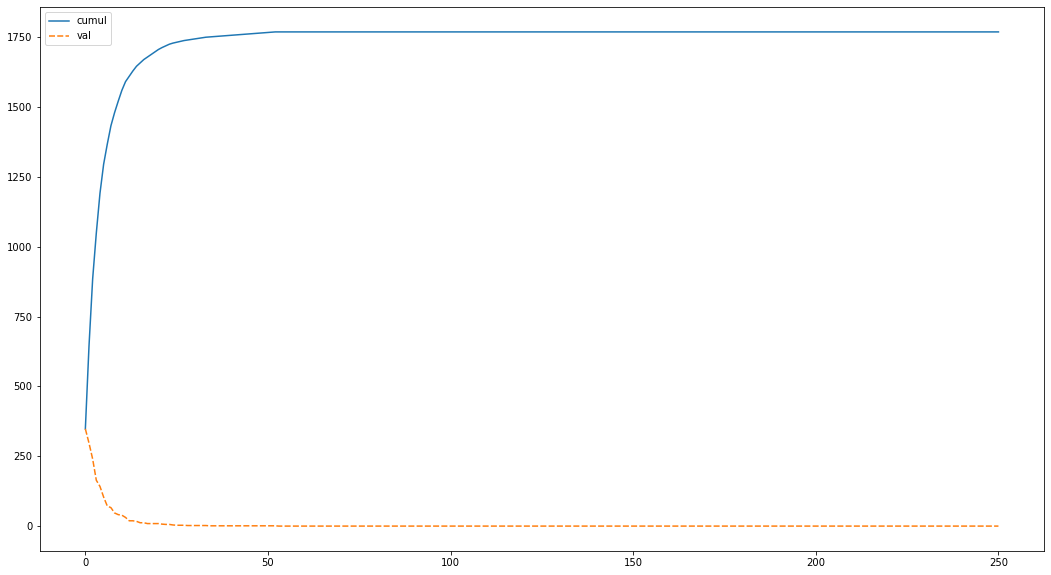

In [39]:
print(distribution.freq)
fig=plt.figure(figsize=(18,10))
sns.lineplot(distribution[['cumul','val']])

In [40]:
s = distribution['val'].values[0]
m = distribution['val'].sum()
r = random.randint(0,1700)
min = distribution.index[0]
print(r, m, s)
v = distribution['cumul'].loc[lambda x: x>=r].index.min()
print(v)

350 1769 348
1


In [41]:
def getRandomValue(df,crit,val,ref):
    nb = df[val].count()
    max = df[crit].max()
    r = (np.random.uniform(0,max))
    #print(r,max)
    id = df[crit].loc[lambda x: x>=r].index.min()
    if (id>0):
        v = (df[val][id]-df[val][id-1])*(r-df[crit][id-1])/df[ref][id] + df[val][id-1]
    else:
        v = (df[val][id])*r/df[ref][id]
    #print(nb,v,id)
    return v

In [59]:
getRandomValue(distribution,'cumul','freq','val')

0.9939362963275883

[1.06411158e+00 7.48362112e-01 1.93363087e-01 9.01131737e-01
 1.63802565e-01 2.34405517e+00 8.51353217e-01 2.61738246e-02
 7.25866098e-01 3.29828533e+00 3.25010991e-01 7.73789973e-01
 8.22221679e+00 3.72977638e-01 1.76886136e+00 1.24628202e-01
 2.13047558e+01 1.15071730e-01 2.58601247e-01 8.74093183e-01
 1.57054073e-01 1.04115259e+01 1.02167362e+00 1.69244063e-01
 7.80190900e-01 5.75873366e+00 1.49800434e+00 2.57910350e-01
 5.11168906e-01 7.68299756e+00 1.46702634e-01 1.13424786e+00
 1.18572883e+01 1.98618658e-01 3.67800734e+00 4.07260374e+00
 1.13210475e+00 8.11125345e-01 2.30360901e-01 2.82248781e-01
 4.98831343e+00 1.42214433e-01 6.13883862e-02 1.58153850e-01
 2.65317911e-01 5.03246493e-01 4.26092878e-01 4.74283113e+00
 9.56903531e-02 5.32046789e+00 2.47874755e+00 1.86031888e+00
 2.17568148e+00 1.11105533e-01 5.85559940e+00 2.36903067e+00
 2.15575951e+00 6.99538891e+00 3.18949760e+00 2.21692640e-01
 5.81612576e-02 2.87520311e+00 2.85033597e-01 5.49423721e+00
 1.05158483e+00 3.403701

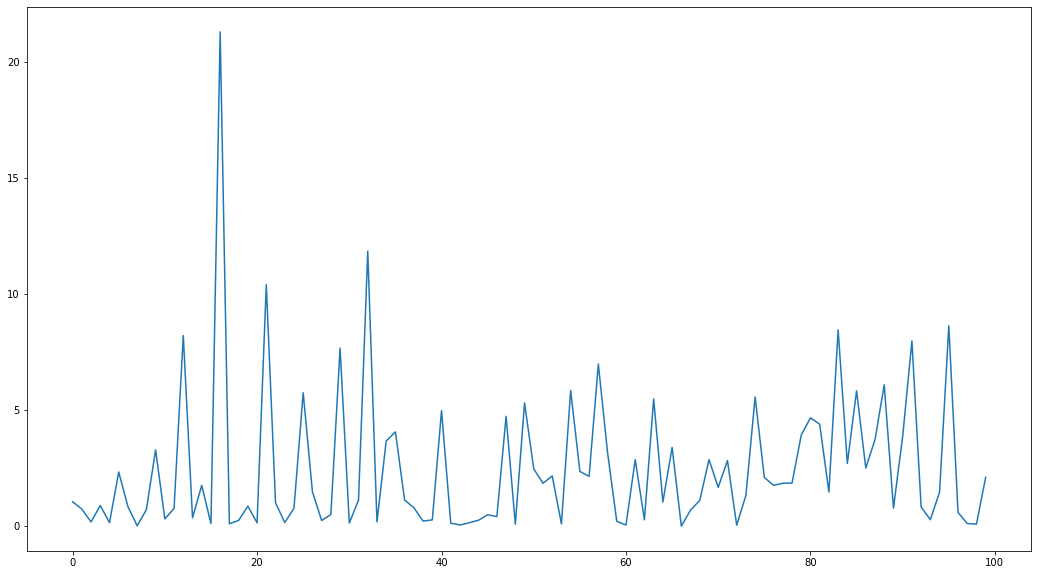

In [43]:
simul = np.ones(100)
for i in range(100):
    simul[i] = (getRandomValue(distribution,'cumul','freq','val'))
    
print(simul)

fig = plt.figure(figsize=(18,10))
plt.plot(simul)

In [ ]:
#distribution.reset_index(drop=True,inplace=True)
#distribution.set_index()
distribution